# Project 1 Part 2: EDA
---

Author: Jackson Muehlbauer

Date: 3/1/2023

In [89]:
# imports 
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [94]:
# Making bar plot function to display the counts of the unique entries in the categorical fields
def make_bar(data, x, y):
  '''
  data = pandas dataframe
  x = field name
  y = string for field name
  '''
  fig, ax = plt.subplots()

  # Create a dataframe with the value counts for the specified column, sort descending. 
  counts = data[x].value_counts().sort_values(ascending = False).to_frame()
  
  sns.barplot(data = counts, x = counts.index, y = counts[x], ax=ax, edgecolor = 'k')
  plt.xticks(rotation = 90)
  plt.xlabel(f'{y}')
  plt.ylabel(f'Counts for each {y} category')

  return fig, ax

In [91]:
def million_m(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-6:,.0f}M'

In [79]:
# Load in CSVs

y2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
y2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

# Concat
combined = pd.concat([y2000, y2001], axis = 0)
display(combined.head(2))

# Saving out merged csv.gz for all tmdb api data
combined.to_csv('Data/tmdb_results_combined.csv.gz', compression = 'gzip', index = False)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [80]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2527 entries, 0 to 1304
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2527 non-null   object 
 1   adult                  2525 non-null   float64
 2   backdrop_path          1351 non-null   object 
 3   belongs_to_collection  202 non-null    object 
 4   budget                 2525 non-null   float64
 5   genres                 2525 non-null   object 
 6   homepage               169 non-null    object 
 7   id                     2525 non-null   float64
 8   original_language      2525 non-null   object 
 9   original_title         2525 non-null   object 
 10  overview               2474 non-null   object 
 11  popularity             2525 non-null   float64
 12  poster_path            2266 non-null   object 
 13  production_companies   2525 non-null   object 
 14  production_countries   2525 non-null   object 
 15  rele

In [81]:
# Drop duplicate rows
print(combined.duplicated().sum())
combined.drop_duplicates(inplace = True)
print(combined.duplicated().sum())

1
0


In [82]:
# 1. How many movies have finacial information?
filter_finance = (combined['revenue'] > 0) | (combined['budget'] > 0)

combined = combined.loc[filter_finance, :]
print(f'There are {combined.shape[0]} movies with some financial information')

There are 631 movies with some financial information


R        230
PG-13    131
PG        36
NR        17
G         14
Name: certification, dtype: int64


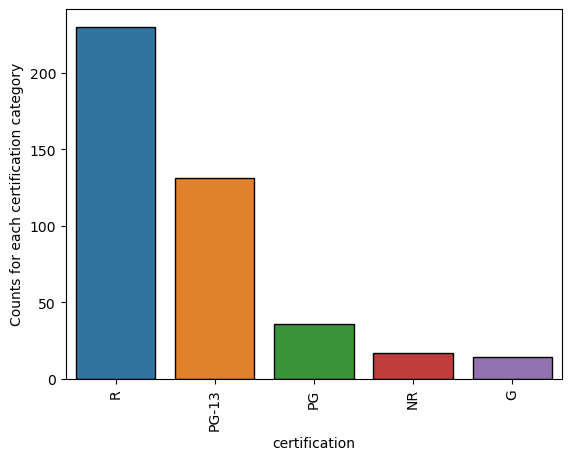

In [95]:
# 2. How many movies are there in each of the certification categories
make_bar(combined, 'certification', 'certification');
print(combined['certification'].value_counts())

R        230
PG-13    131
PG        36
G         14
Name: certification, dtype: int64


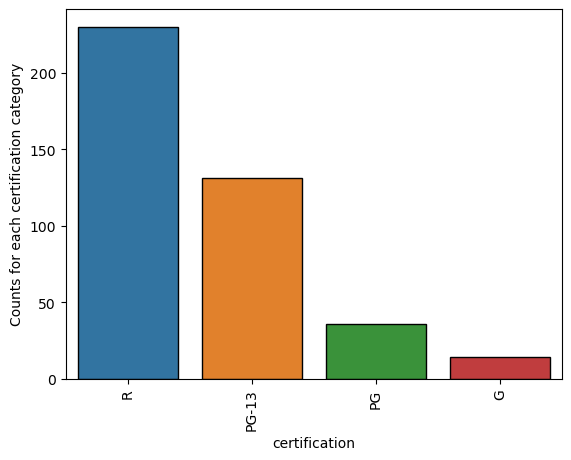

In [96]:
# 2. How many movies are there in each of the certification categories
# but only for G/PG/PG-13/R

combined_2 = combined.query('certification == ["G", "PG", "PG-13", "R"]')
make_bar(combined_2, 'certification', 'certification');
print(combined_2['certification'].value_counts())

certification
G        1.237463e+08
PG       1.095338e+08
PG-13    9.926299e+07
R        3.306692e+07
Name: revenue, dtype: float64


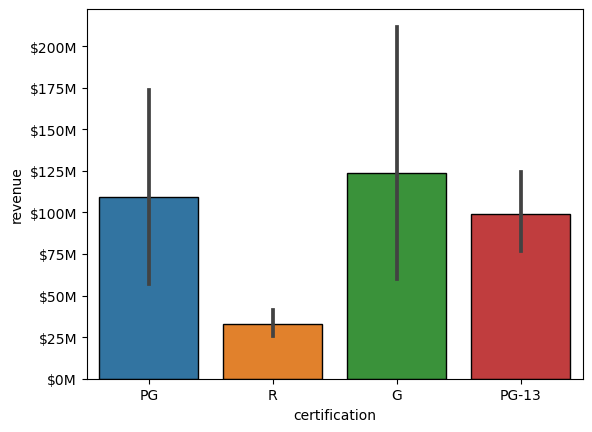

In [93]:
# 3. What is the average revenue per certification category

# Barplot to answer question
fig, ax = plt.subplots()
sns.barplot(data = combined_2, x = 'certification', y = 'revenue', ax = ax, edgecolor = 'k');
price_fmt_1M = FuncFormatter(million_m)
ax.yaxis.set_major_formatter(price_fmt_1M)

# Values to answer question
print(combined_2.groupby('certification')['revenue'].mean())

certification
G        4.085714e+07
PG       4.381937e+07
PG-13    4.300884e+07
R        1.966089e+07
Name: budget, dtype: float64


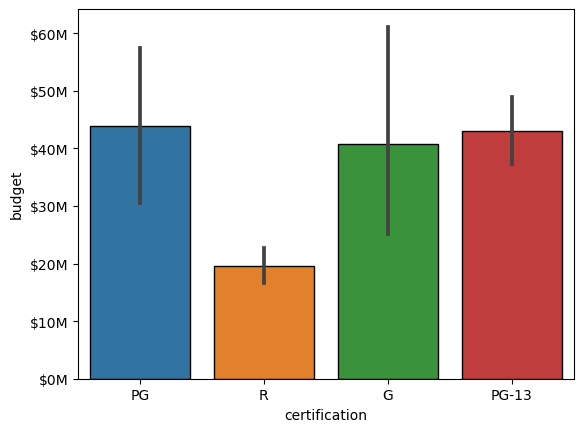

In [92]:
# 4. What is the average budget per certification category

# Barplot to answer question
fig, ax = plt.subplots()
sns.barplot(data = combined_2, x = 'certification', y = 'budget', ax = ax, edgecolor = 'k');
price_fmt_1M = FuncFormatter(million_m)
ax.yaxis.set_major_formatter(price_fmt_1M)

# Values to answer question
print(combined_2.groupby('certification')['budget'].mean())